This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


also [this](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
# List of countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']

In [4]:
# Function for grouping countries by region
def grouping_by_region(raw_data, min_val):
    data_day = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    df_t = data_day.transpose()
    # Melt data so that it is long
    data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
    #
    data.loc[(data.value < min_val),'value'] = None
    # Pivot data to wide & index by date
    df_t = data.pivot(index='date', columns='Country/Region', values='value')
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(df_t.index)
    df_t.set_index(datetime_index, inplace=True)
    return df_t

In [5]:
# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

In [6]:
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    
    for col in df1.columns:
        print(col, df1[col].first_valid_index())
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

## Confirmed

In [7]:
# Import data & check it out
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [8]:
df = grouping_by_region(raw_data_confirmed, 2000)
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


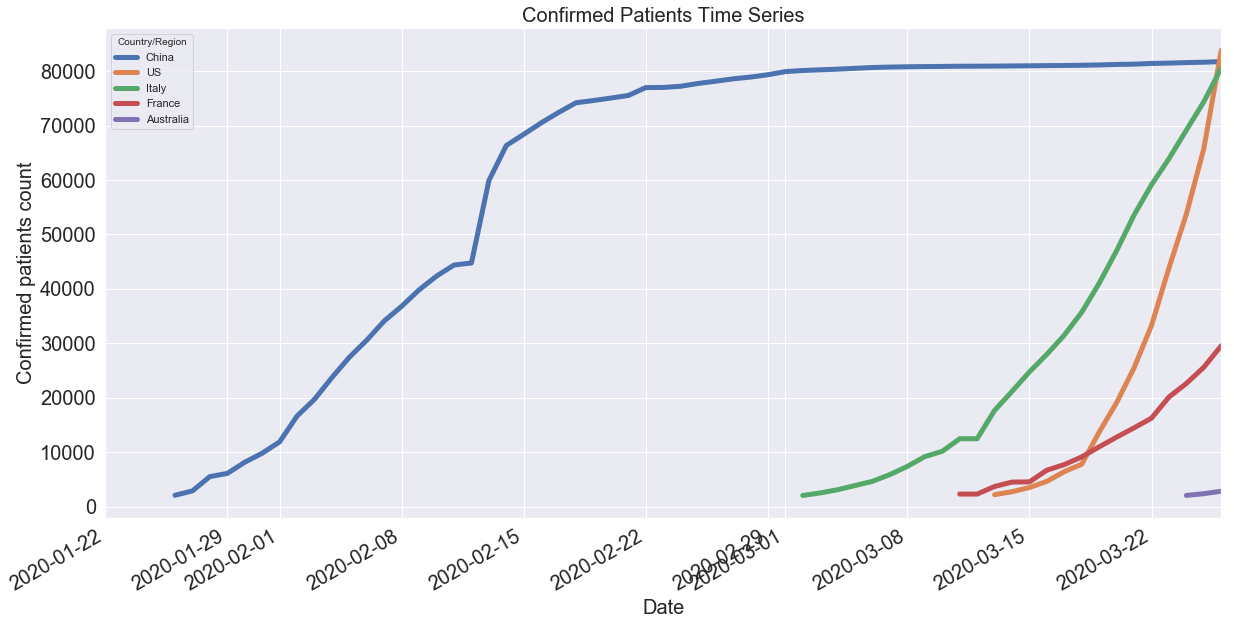

In [9]:
# Plot time series of several countries of interest
plot_time_series(df[poi], 'Confirmed Patients Time Series', 'Date', 'Confirmed patients count', False)

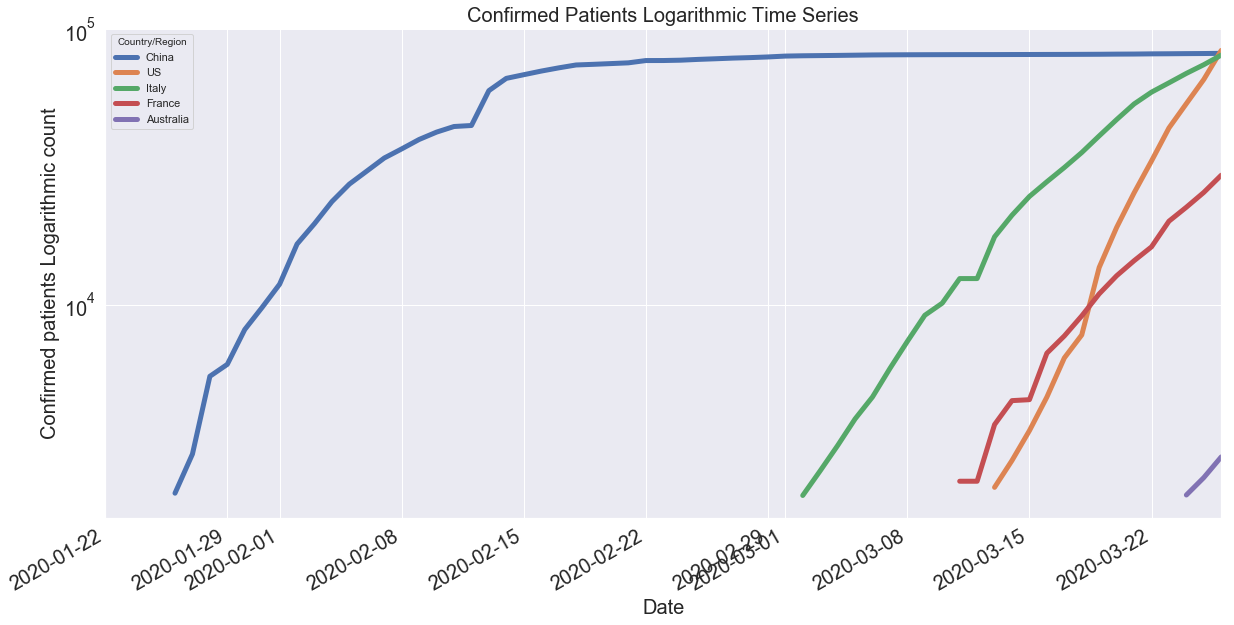

In [10]:
# Plot time series logarithmic of several countries of interest
plot_time_series(df[poi], 'Confirmed Patients Logarithmic Time Series', 'Date', 'Confirmed patients Logarithmic count', True)

## Deaths

[This](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html) and [this](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

In [11]:
# Import data & check it out
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,2,2,2,2,2,4,5,5,6
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,7,9,11,15,17,17,19,21,25
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = grouping_by_region(raw_data_deaths, 25)
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


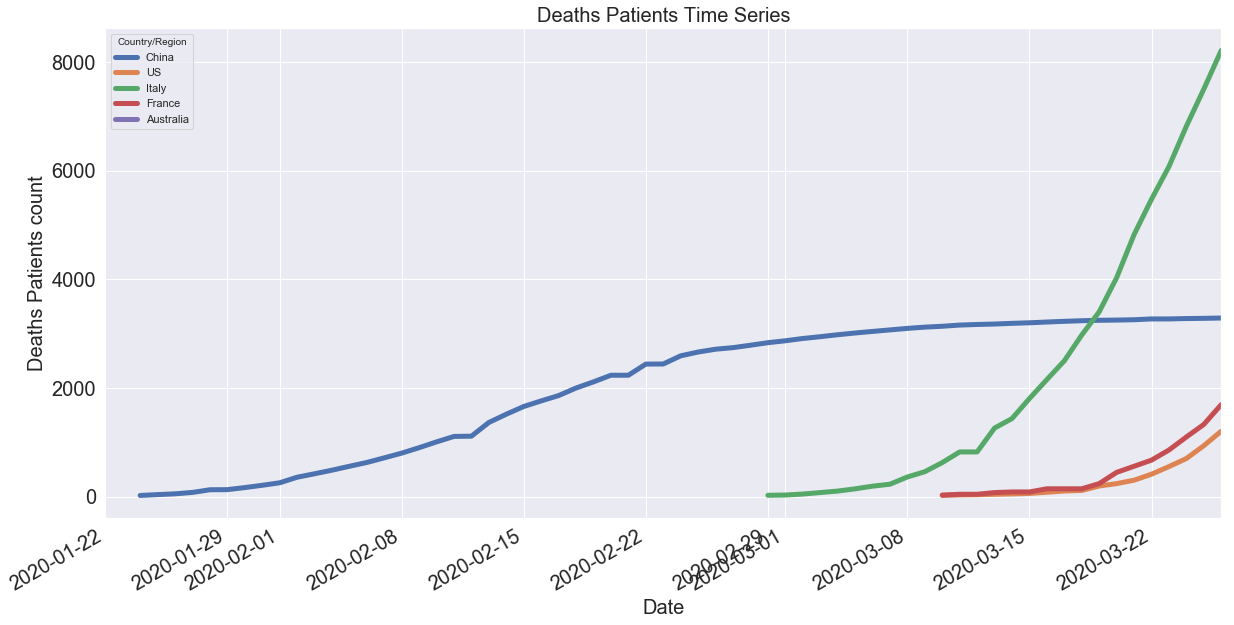

In [13]:
# Plot time series of several countries of interest
plot_time_series(df[poi], 'Deaths Patients Time Series', 'Date', 'Deaths Patients count', False)

In [14]:
clean_df = data_manipulation(df)

Algeria 64
Austria 62
Belgium 58
Brazil 60
Canada 61
China 2
Denmark 62
Ecuador 62
France 48
Germany 56
Greece 64
Indonesia 57
Iran 36
Iraq 62
Italy 38
Japan 54
Korea, South 40
Netherlands 55
Philippines 60
Portugal 62
Spain 47
Sweden 61
Switzerland 55
Turkey 60
US 48
United Kingdom 54


In [15]:
clean_df.head()

Country/Region,Algeria,Austria,Belgium,Brazil,Canada,China,Denmark,Ecuador,France,Germany,...,"Korea, South",Netherlands,Philippines,Portugal,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
0,25.0,28.0,37.0,25.0,25.0,26.0,32.0,27.0,33.0,28.0,...,28.0,43.0,25.0,33.0,28.0,25.0,27.0,30.0,28.0,56.0
1,NaN,30.0,67.0,34.0,26.0,42.0,34.0,28.0,48.0,44.0,...,28.0,58.0,33.0,43.0,35.0,36.0,28.0,37.0,36.0,56.0
2,NaN,49.0,75.0,46.0,30.0,56.0,41.0,34.0,48.0,67.0,...,35.0,77.0,35.0,60.0,54.0,62.0,41.0,44.0,40.0,72.0
3,NaN,NaN,88.0,59.0,38.0,82.0,NaN,NaN,79.0,84.0,...,35.0,107.0,38.0,NaN,55.0,77.0,54.0,59.0,47.0,138.0
4,NaN,NaN,122.0,77.0,NaN,131.0,NaN,NaN,91.0,94.0,...,42.0,137.0,45.0,NaN,133.0,NaN,75.0,75.0,54.0,178.0


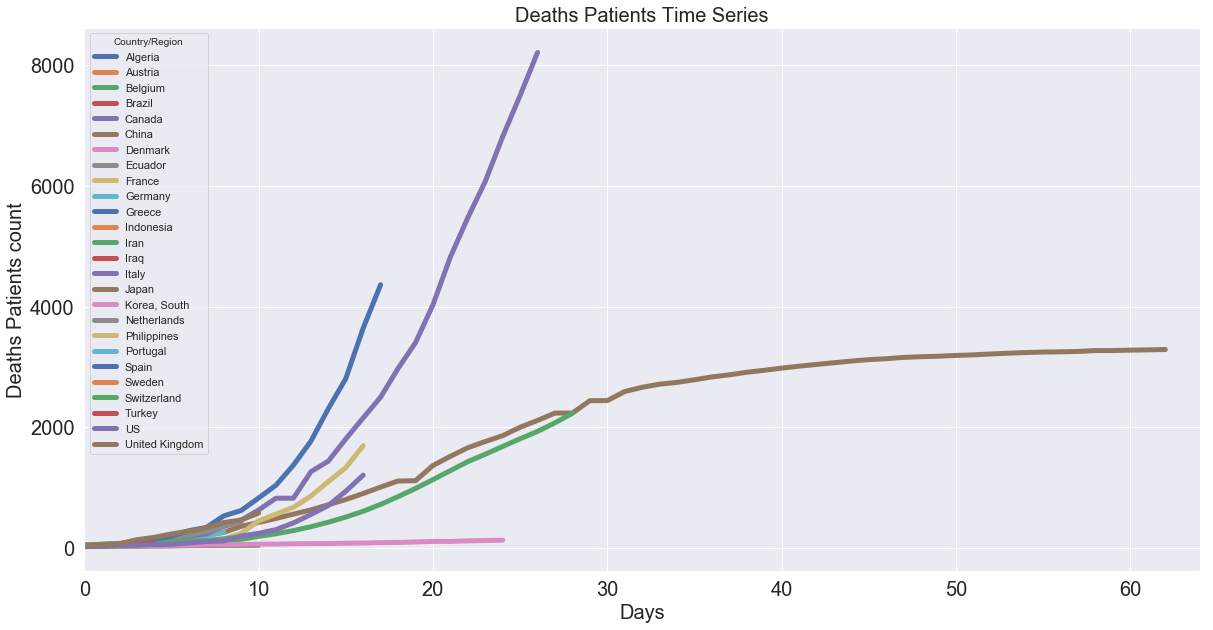

In [16]:
plot_time_series(clean_df, 'Deaths Patients Time Series', 'Days', 'Deaths Patients count', False)

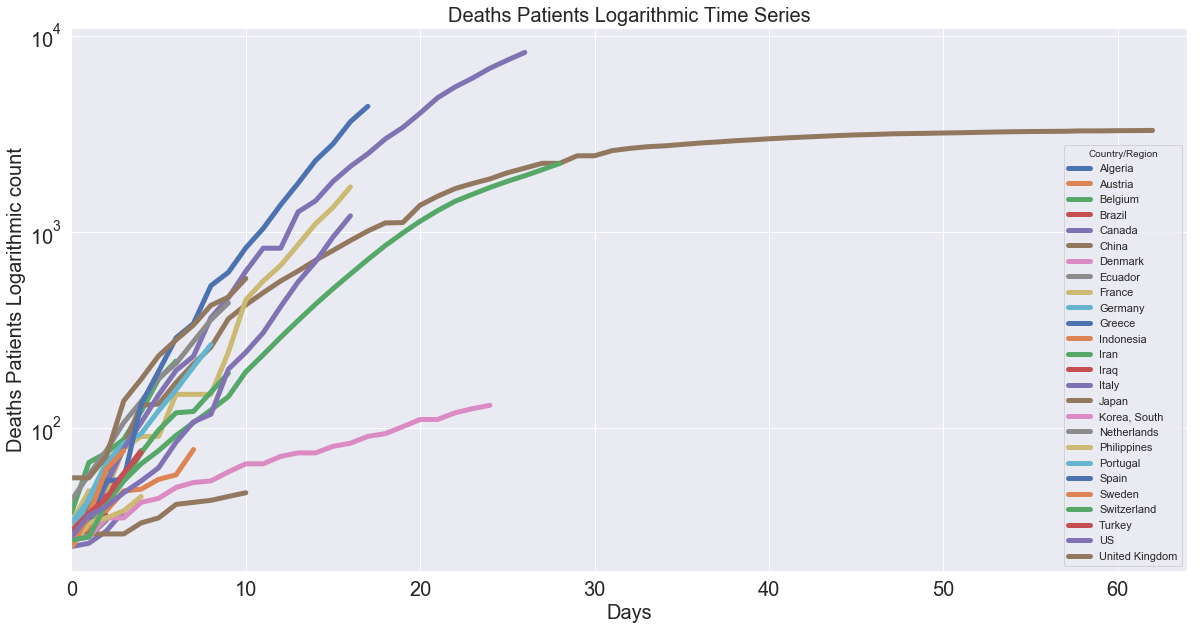

In [17]:
plot_time_series(clean_df, 'Deaths Patients Logarithmic Time Series', 'Days', 'Deaths Patients Logarithmic count', True)

## Recovered

In [18]:
# Import data & check it out
raw_data_recovered = pd.read_csv(recovery_cases_data_url)
raw_data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,2,2,2,10,17,17
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,12,32,32,32,65,65,24,65,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = grouping_by_region(raw_data_recovered, 50)
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


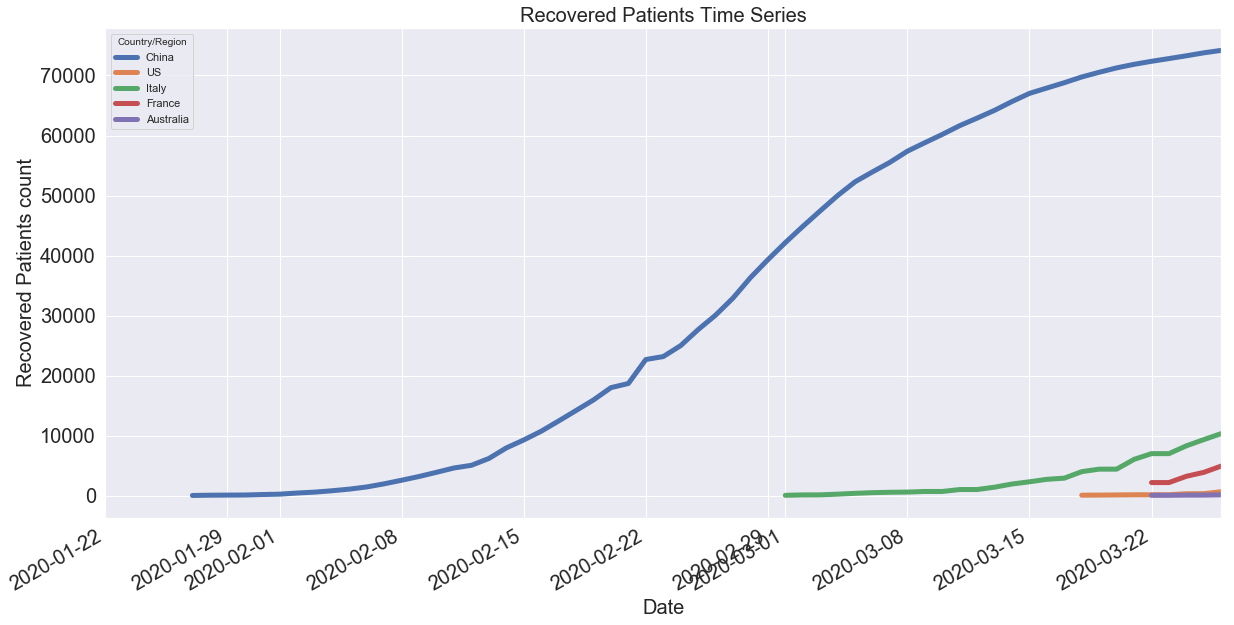

In [20]:
# Plot time series of several countries of interest
plot_time_series(df[poi], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)

In [21]:
clean_df = data_manipulation(df)

Algeria 60
Argentina 62
Australia 60
Austria 64
Bahrain 53
Belgium 59
Canada 62
China 5
Denmark 64
Diamond Princess 49
Egypt 60
France 60
Germany 54
Iceland 62
Iran 37
Iraq 59
Israel 62
Italy 39
Japan 45
Korea, South 44
Malaysia 56
Romania 59
Singapore 32
Spain 49
Switzerland 60
Thailand 62
US 56
United Arab Emirates 63
United Kingdom 55


In [22]:
clean_df.head()

Country/Region,Algeria,Argentina,Australia,Austria,Bahrain,Belgium,Canada,China,Denmark,Diamond Princess,...,"Korea, South",Malaysia,Romania,Singapore,Spain,Switzerland,Thailand,US,United Arab Emirates,United Kingdom
0,65.0,52.0,88.0,112.0,60.0,263.0,110.0,58.0,50.0,325.0,...,135.0,60.0,52.0,51.0,183.0,131.0,52.0,105.0,52.0,53.0
1,65.0,52.0,88.0,NaN,77.0,263.0,183.0,101.0,NaN,325.0,...,135.0,75.0,64.0,51.0,183.0,131.0,70.0,121.0,52.0,67.0
2,NaN,63.0,115.0,NaN,81.0,263.0,184.0,120.0,NaN,325.0,...,118.0,87.0,64.0,53.0,193.0,131.0,88.0,147.0,NaN,67.0
3,65.0,NaN,119.0,NaN,88.0,461.0,NaN,135.0,NaN,325.0,...,118.0,114.0,79.0,62.0,517.0,131.0,NaN,176.0,NaN,67.0
4,NaN,NaN,172.0,NaN,100.0,547.0,NaN,214.0,NaN,325.0,...,247.0,139.0,86.0,62.0,517.0,131.0,NaN,178.0,NaN,67.0


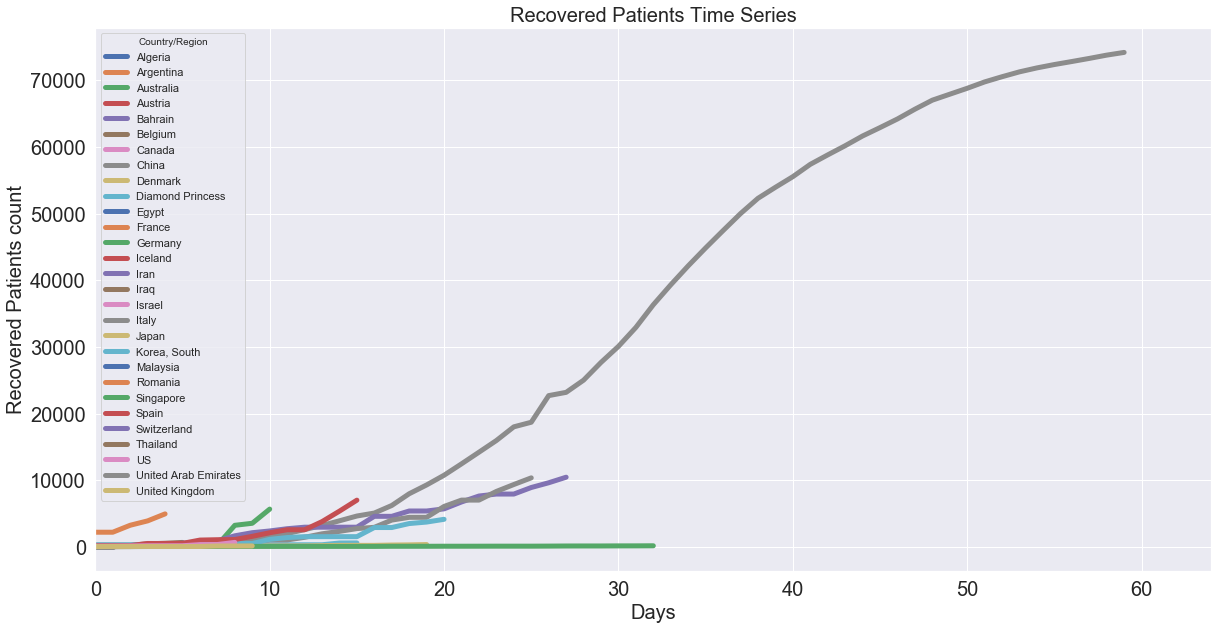

In [23]:
plot_time_series(clean_df, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', False)

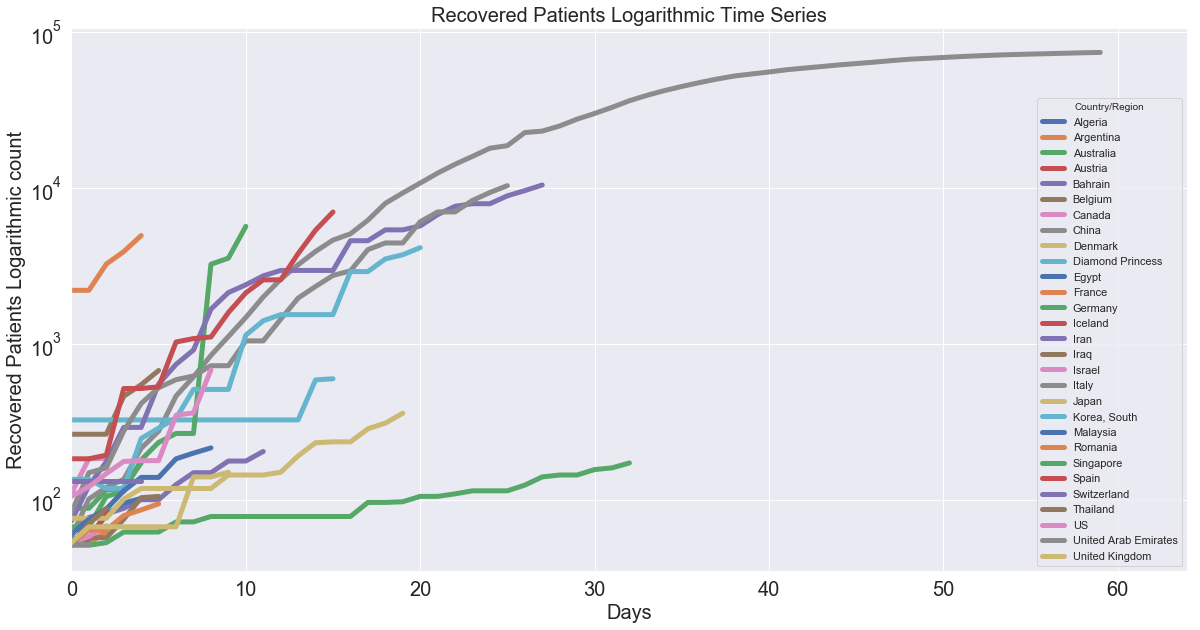

In [24]:
plot_time_series(clean_df, 'Recovered Patients Logarithmic Time Series', 'Days', 'Recovered Patients Logarithmic count', True)